# Caso Práctico 1: Aprendizaje Supervisado Clasificación

## Librerías

In [1]:
! pip install scikit-learn

In [2]:
%matplotlib inline

#Módulos de manipulación de datos
import pandas as pd
import numpy as np

#Módulos de scikit-learn de machine learning
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

#Módulos de evaluación de modelos
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay

#Librerías de visualización
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [4]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')

Cargamos los siguientes datasets de datos, que contienen tres variables, dos relativas a valores y una variable `y`que contiene la clase. Esta clase es binaria y valdrá cero o uno.

In [5]:
df1.head()

X1         X2  y
0  1.851247  -6.732371  1
1 -1.205689  -6.293264  0
2  0.169261 -13.061934  0
3 -0.389015  -0.491930  1
4  4.947719  -1.705707  1

Guardamos los dataframes en una lista para poder trabajar con ellos dentro de bucles y reducir las líneas de código.

In [6]:
datasets = [df1, df2, df3]
datasets_names = ['df1', 'df2', 'df3']

Vamos a representar los datos gráficamente para poder visualizar la distribución de las clases

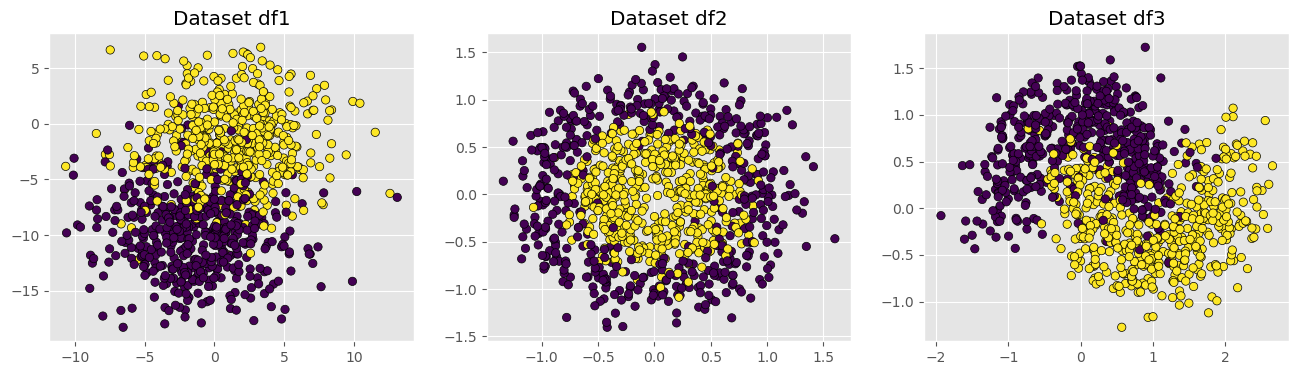

In [7]:
f, axes = plt.subplots(1, 3, figsize=(16,4))

for ax, df,name in zip(axes, datasets[:3],datasets_names[:3]):
    ax.scatter(df['X1'], df['X2'], c=df['y'], edgecolors='k')
    ax.set_title('Dataset '+ name)

plt.show()

## Train Test split

Separa cada conjunto de datos en un conjunto de entrenamiento y de test utilizando el método `train_test_split`de scikit-learn. En esta primera ocasión se proporciona el código. En este caso asignamos el 20% a test y el 80% restante a train. Recordemos que la mayor cantidad de datos debe ir al conjunto de entrenamiento.

In [8]:
datasets_train = []
datasets_test = []

for df in datasets:
    df_train, df_test = train_test_split(df,test_size=0.2,
                                         stratify=df['y'], 
                                         random_state=1993)   
    datasets_train.append(df_train)
    datasets_test.append(df_test)

Basándote en el código dado anteriormente, utilizando un bucle, grafica para cada conjunto original de datos, su conjunto de train y de test, en gráficos diferentes.

# Modelos de Machine Learning

A continuación ejecuta diferentes modelos de los vistos en esta unidad y compara su rendimiento en cada caso.

Todos los algoritmos implementados en scikit-learn están expuestos en su API mediante objetos de tipo *Estimator*, que garantiza que todos los modelos disponen de la misma API:

- `Estimator.fit(X, y)`: ajusta los parámetros del modelo a los datos
- `Estimator.predict(X)`: predicce los valores de salida para datos nuevos
- `Estimator.score(X, y)`: evalúa los resultados de la predicción

## Logistic Regression

### Entrenamiento y Predicción

En este apartado debes entrenar el modelo y realizar la predicción. En esta primera ocasión se proporciona el código. 
En primer lugar inicializamos el objeto de la regresión logística.

In [9]:
lr = LogisticRegression()



Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos: 

In [10]:
lr.fit(df_train[['X1', 'X2']], df_train['y'])

LogisticRegression()



Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos:

In [11]:
prediction = lr.predict(df_test[['X1', 'X2']])

Utilizando el código anterior, ejecuta dentro de un bucle el entrenamiento y la predicción para cada dataset de datos. Grafica la frontera de decisión del modelo en cada caso para ver las predicciones que realiza con el método `plot_decision_regions`también de scikit-learn.

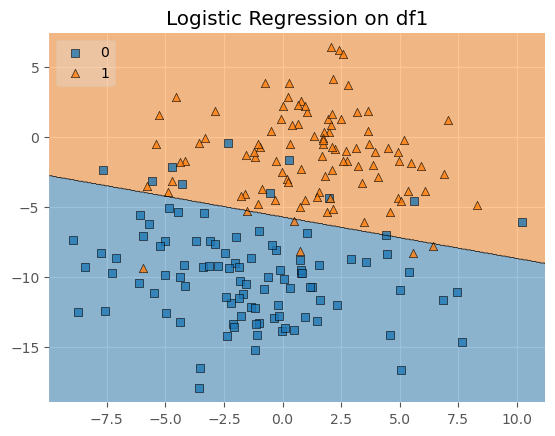

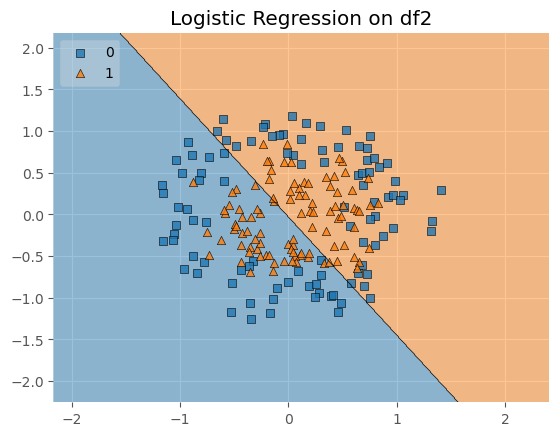

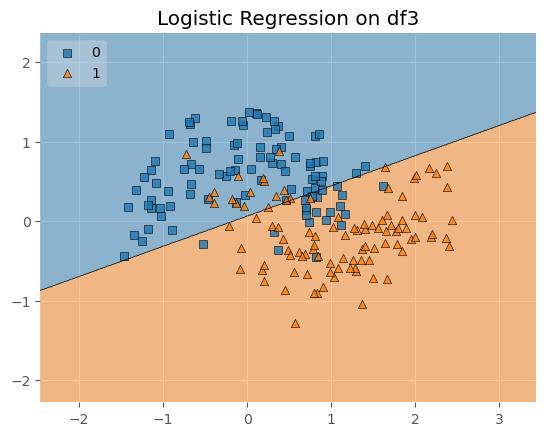

In [12]:
logistic_regs = []
for df_train, df_test,names in zip(datasets_train, datasets_test,datasets_names):
    
    lr = LogisticRegression() 
    lr.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values,clf = lr, legend=2)
    plt.title('Logistic Regression on '+names)
    plt.show()
    
    logistic_regs.append(lr)

### Evaluación

Debemos evaluar el rendimiento de nuestro modelo como siguiente paso. Se proporciona el código para la evaluación del modelo sobre cada conjunto de datos.

Analiza las métricas. ¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 

Accuracy:  0.915
Precision: 0.895
Recall:    0.94
Fscore:    0.917




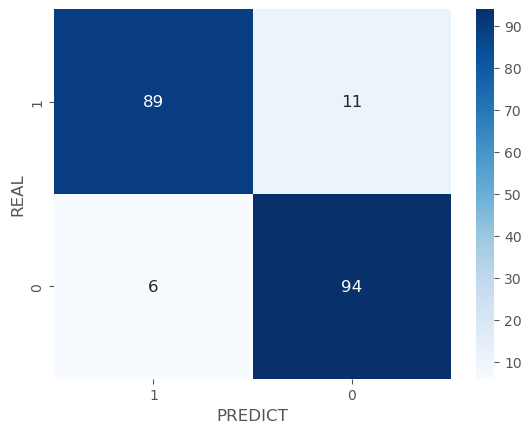

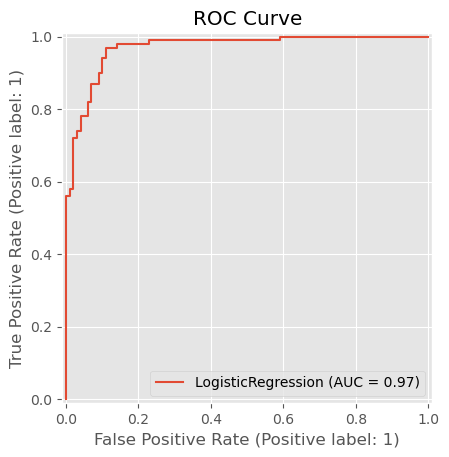

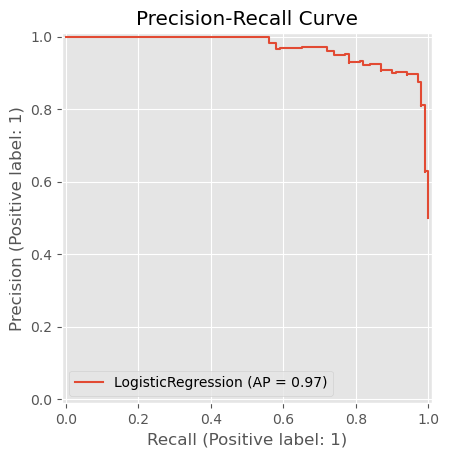

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 

Accuracy:  0.48
Precision: 0.481
Recall:    0.51
Fscore:    0.495




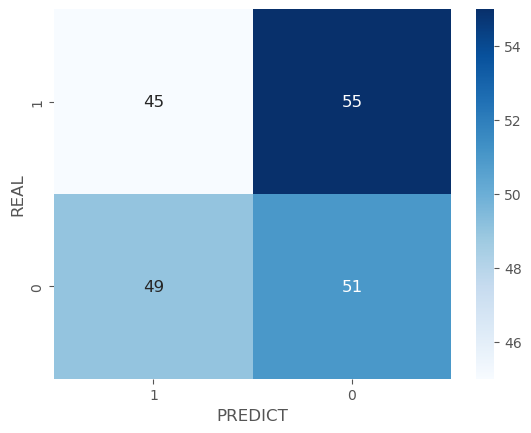

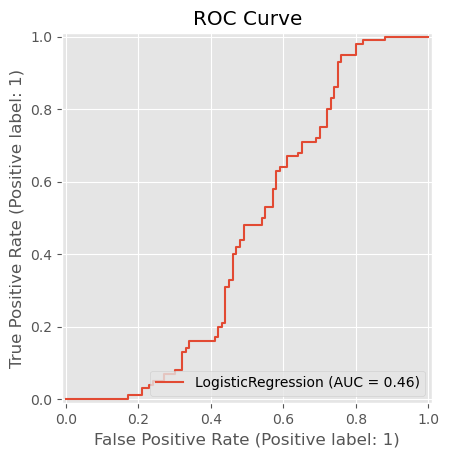

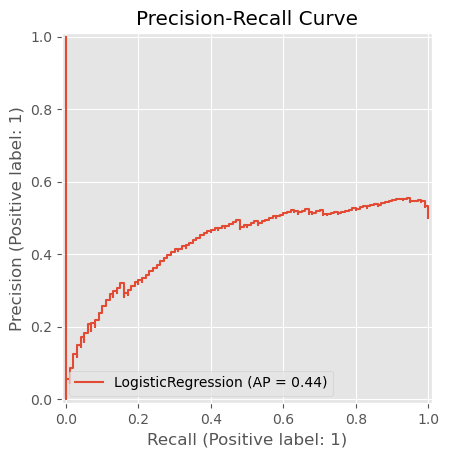

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 

Accuracy:  0.81
Precision: 0.798
Recall:    0.83
Fscore:    0.814




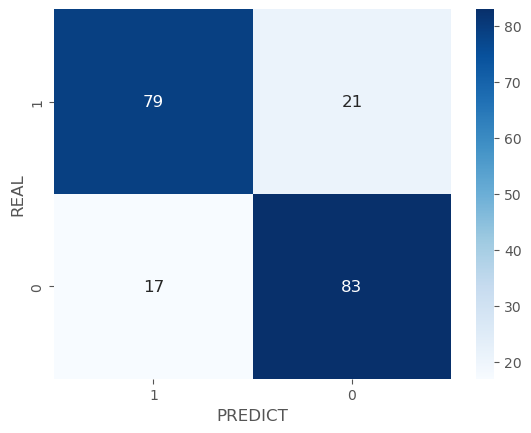

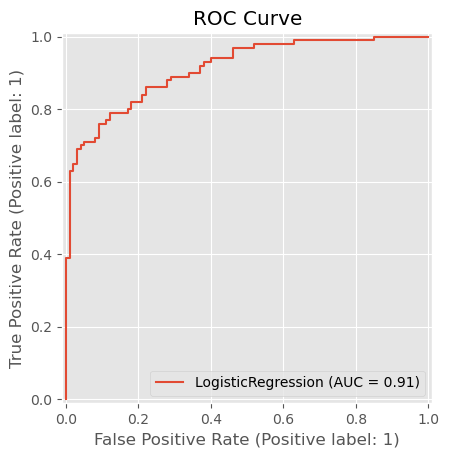

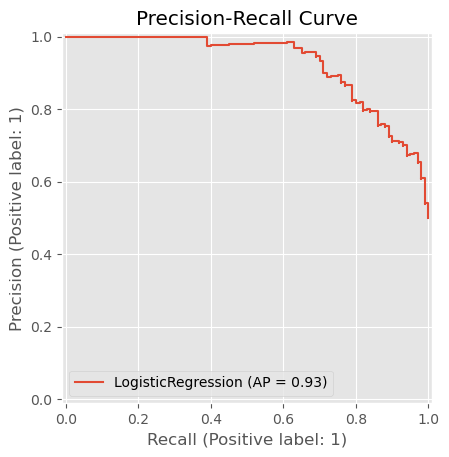

In [13]:
for lr, df_test,names in zip(logistic_regs, datasets_test,datasets_names):
    
    print('############################################## ')
    print('Classification Report for '+names)
    print('############################################## \n')

    #Realizamos la predicción de los datos

    df_test['y_lr'] = lr.predict(df_test[['X1', 'X2']])

    #Calculamos la matriz de confusión
    print('Matriz de confusiòn: \n')
    conf_mat= confusion_matrix(df_test['y'], df_test['y_lr'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')

    #Calculamos el accuracy
    print("Accuracy: ",accuracy_score(df_test['y'], df_test['y_lr']))

    #Calculamos el resto de métricas de evaluación

    print('Precision:', round(precision_score(df_test['y'], df_test['y_lr']),3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_lr']),3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_lr']),3))
    #print(classification_report(df_test['y'], df_test['y_lr']))
    print('\n')

    # Visualizar la curva ROC
    #plot_roc_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    RocCurveDisplay.from_estimator(lr, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    # Visualizar la curva de precisión-recall
    #plot_precision_recall_curve(lr,  df_test[['X1', 'X2']], df_test['y'])
    PrecisionRecallDisplay.from_estimator(lr, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

* Mejor conjunto de datos: df1.

Las metricas son altas y equilibradas. La precision es alta lo que significa que el modelo predice una clase positiva.Recall muy bueno que indica que casi todos casos positivos fueron identificados.

* Peor conjunto de datos: df2

La precision y recall están cerca de 50%, lo que indica que el modelo está clasificando casi aleatoriamente. La exactitud es de solo 48%, no está logrando captar los patrones correctamente. Las clases no están separadas linealmente, la regressión logistica no es adecuada para este conjunto de datos.

## KNN

A continuación realiza el mismo procedimiento que hicimos con la Regresión Logística para analizar el algoritmo KNN.

### Entrenamiento y predicción

Inicializa el objeto kNN, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

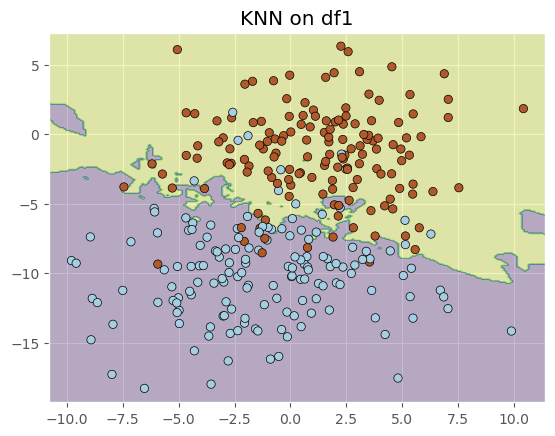

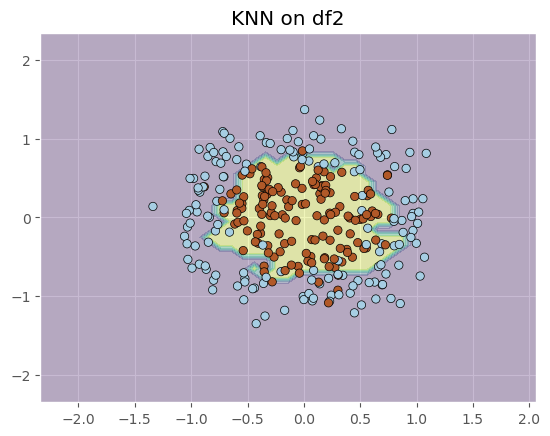

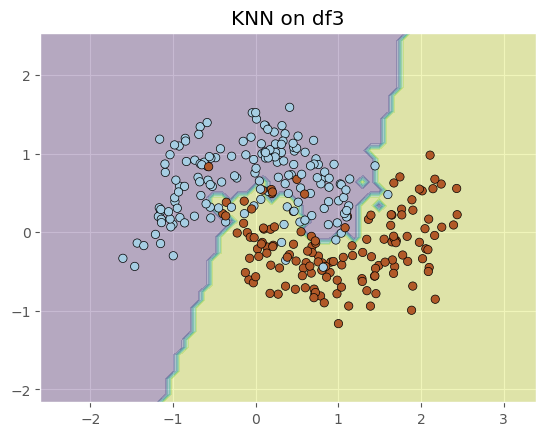

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
knn_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=knn, legend=2)
    plt.title(f'KNN on {name}')
    plt.show()
    
    knn_models.append(knn)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



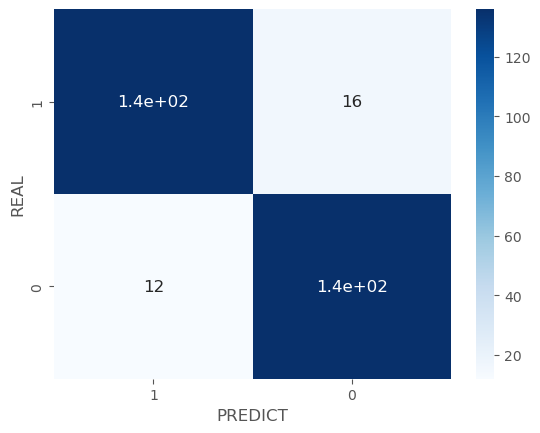

Accuracy: 0.9066666666666666
Precision: 0.895
Recall:    0.919
Fscore:    0.907




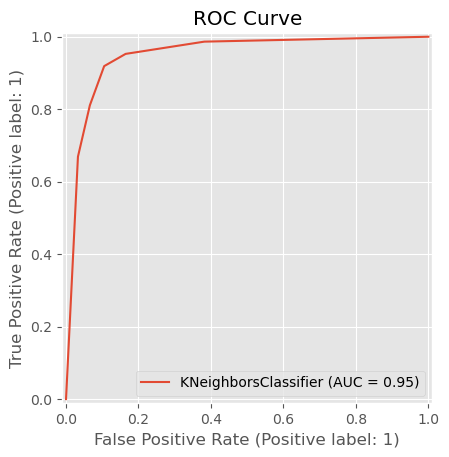

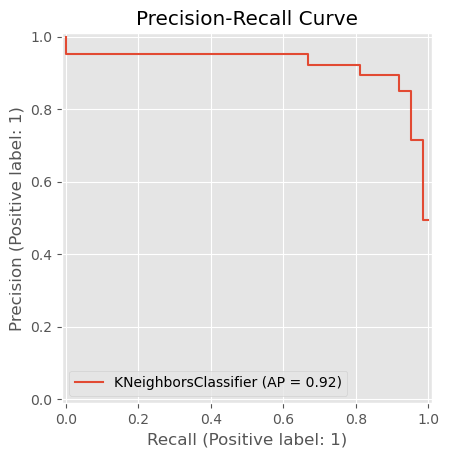

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



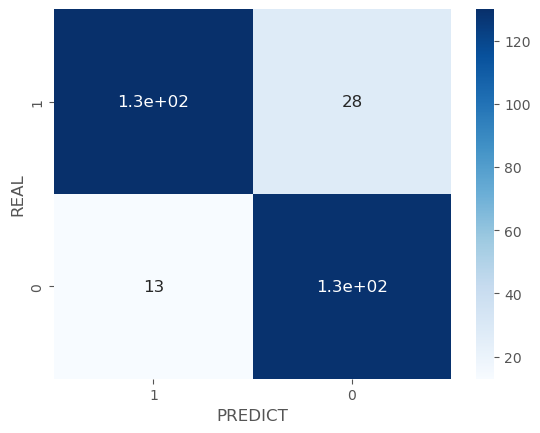

Accuracy: 0.8633333333333333
Precision: 0.822
Recall:    0.908
Fscore:    0.863




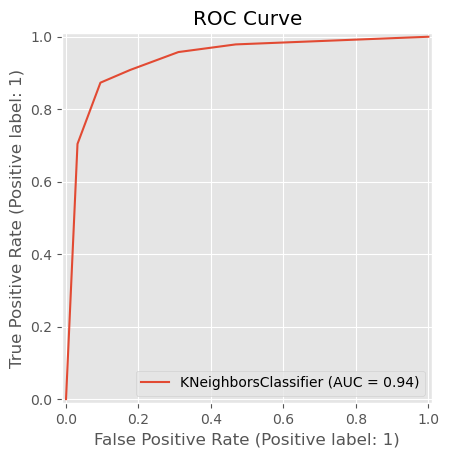

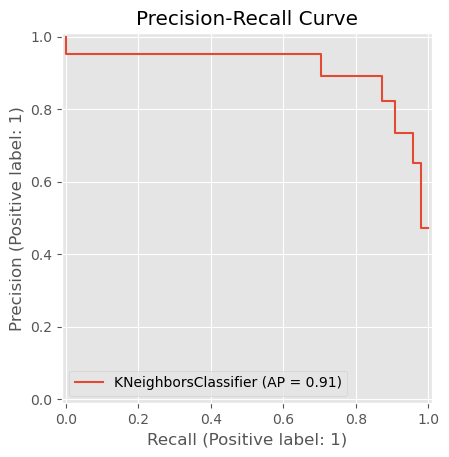

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



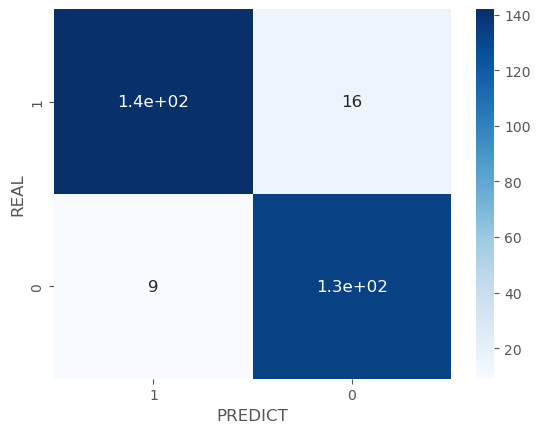

Accuracy: 0.9166666666666666
Precision: 0.893
Recall:    0.937
Fscore:    0.914




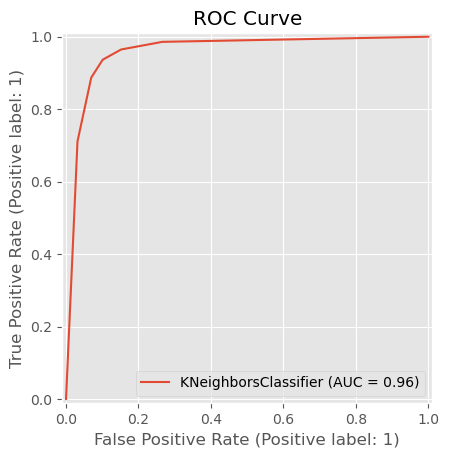

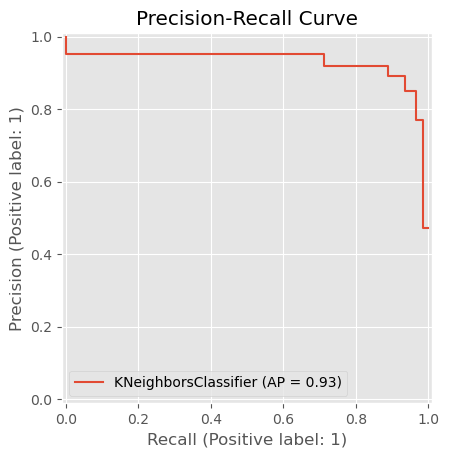

In [15]:
for knn, df_test, name in zip(knn_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_knn'] = knn.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_knn'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_knn']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_knn']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_knn']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_knn']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(knn, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(knn, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

* Mejor conjunto de datos: df3.

DF3 presenta un patrón en el que las clases están cercanas a sus vecinos más similares. Los números de exactitud y precision son muy elevados.

* Peor conjunto de datos: df2.

df2 tiene ruido o clases muy mezcladas. Los puntos están demasiado dispersos, el modelo no logra encontrar estructuras claras.


## SVM

A continuación vamos a relizar el mismo procedimiento con el algoritmo SVM, en primer lugar con un Kernel lineal y luego con un Kernel radial.

### Kernel lineal
#### Entrenamiento y predicción

Utilizando un kernel lineal inicializa el objeto SVC (SVM para clasificación), entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

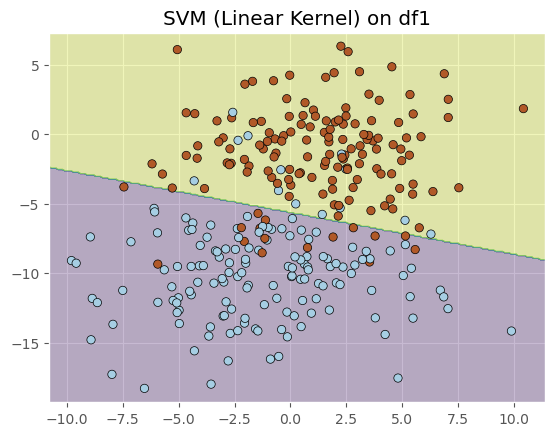

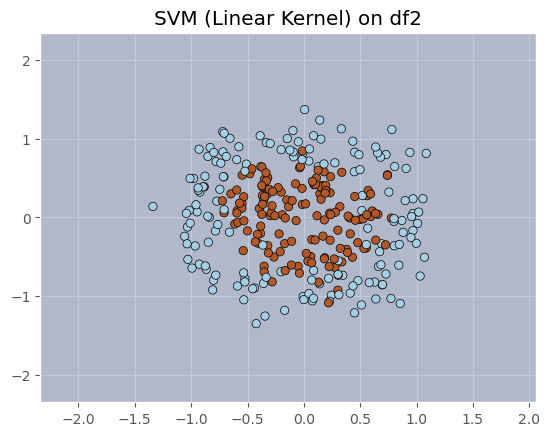

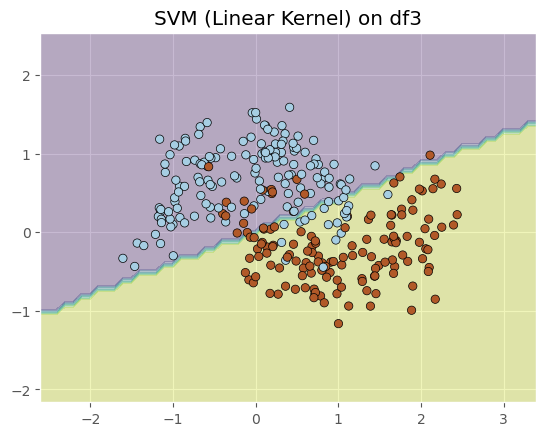

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
svm_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    svm = SVC(kernel='linear')
    svm.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=svm, legend=2)
    plt.title(f'SVM (Linear Kernel) on {name}')
    plt.show()
    
    svm_models.append(svm)

#### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



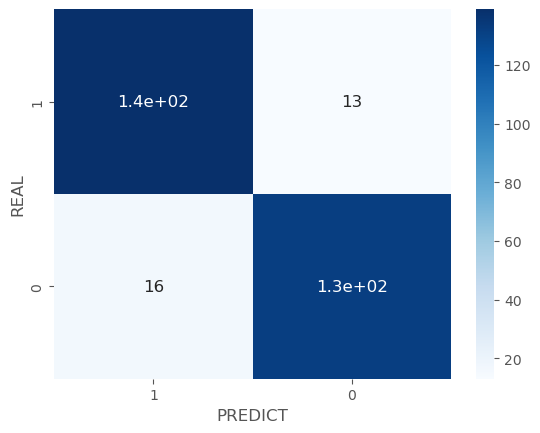

Accuracy: 0.9033333333333333
Precision: 0.91
Recall:    0.892
Fscore:    0.901




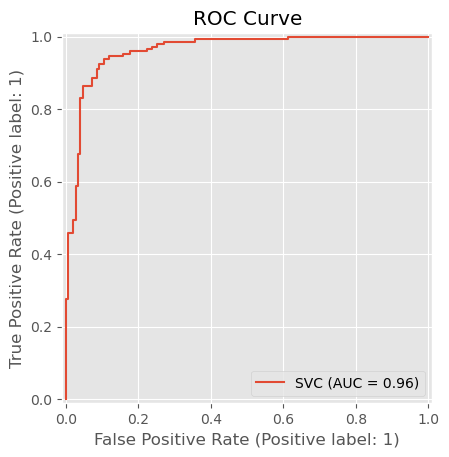

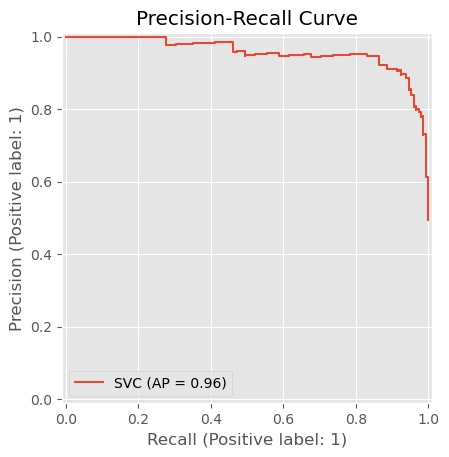

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



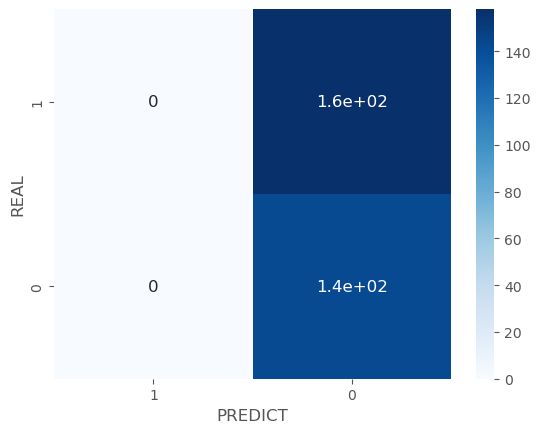

Accuracy: 0.47333333333333333
Precision: 0.473
Recall:    1.0
Fscore:    0.643




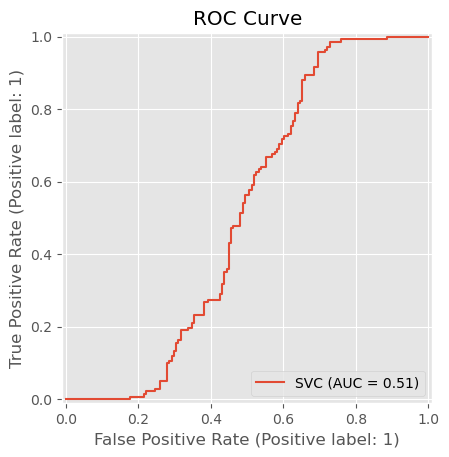

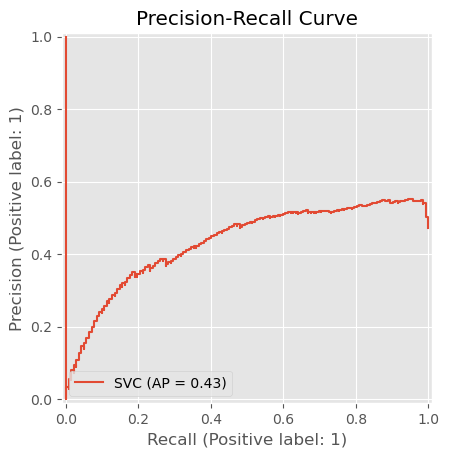

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



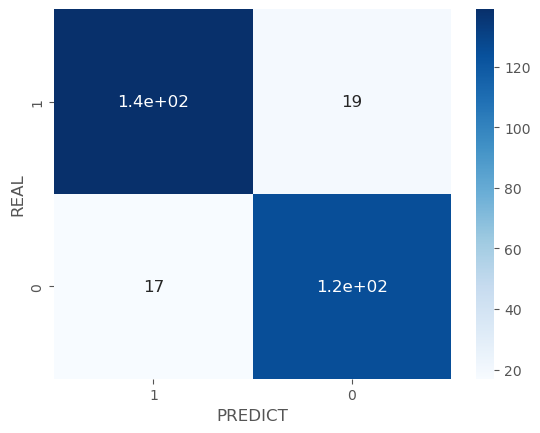

Accuracy: 0.88
Precision: 0.868
Recall:    0.88
Fscore:    0.874




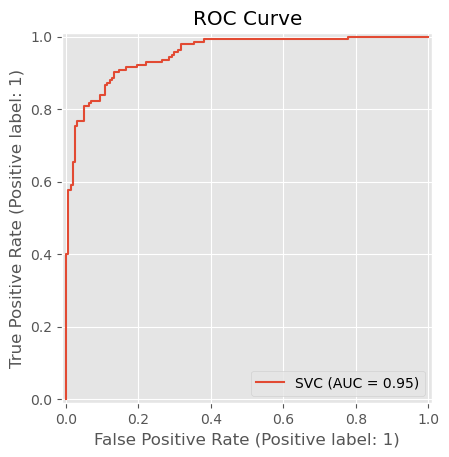

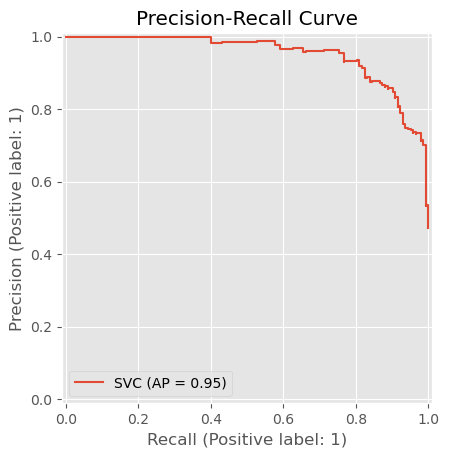

In [17]:
for svm, df_test, name in zip(svm_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_svm'] = svm.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_svm'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_svm']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_svm']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_svm']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_svm']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(svm, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(svm, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()


*Mejor conjunto de datos: df1

Es el que mejor se ajusta a la condicion cuando los datos son separables en un espacio lineal. Alcanza una gran precision.


*Peor conjunto de datos: df2

Tiene datos distribuidos de manera no lienal, poca precisión y exactitud.

### Kernel radial
#### Entrenamiento y predicción

Ahora utilizaremos el kernel radial, cambiando el tipo de kernel al inicializar el clasificador. Inicializa el objeto SVC cambiando el kernel, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

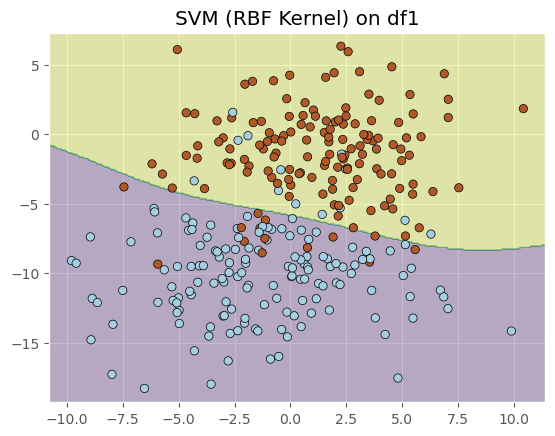

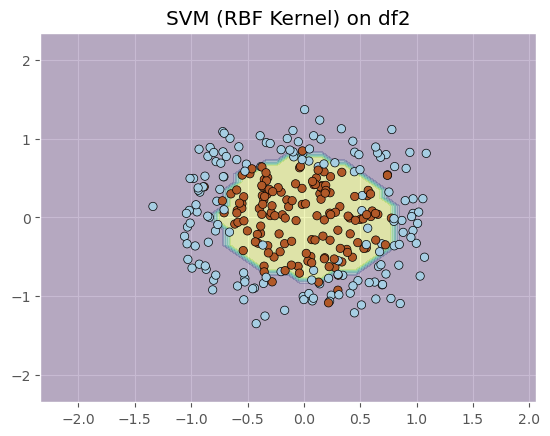

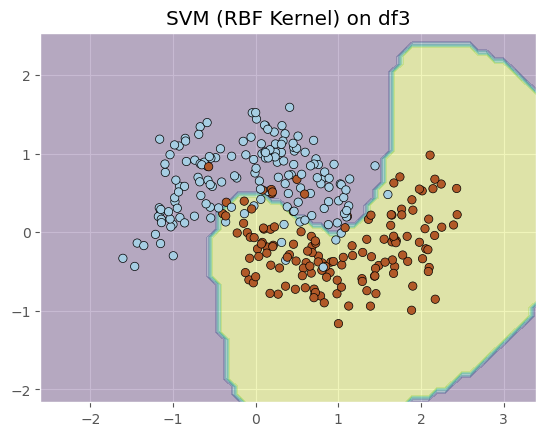

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
svm_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    svm = SVC(kernel='rbf')
    svm.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=svm, legend=2)
    plt.title(f'SVM (RBF Kernel) on {name}')
    plt.show()
    
    svm_models.append(svm)

#### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



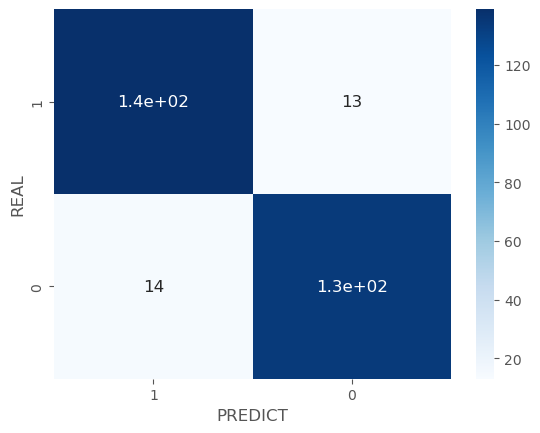

Accuracy: 0.91
Precision: 0.912
Recall:    0.905
Fscore:    0.908




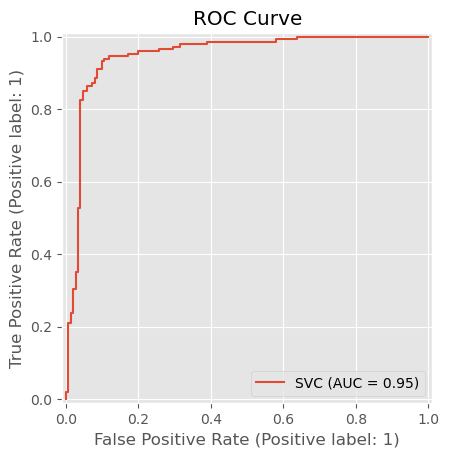

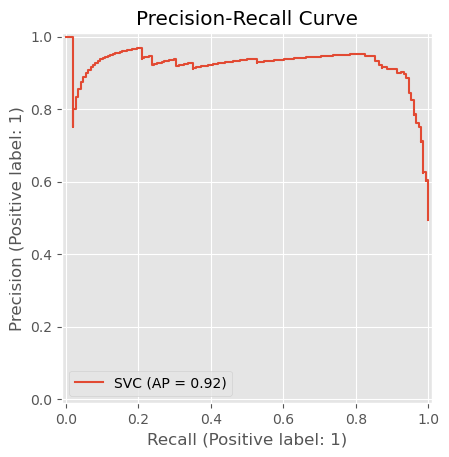

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



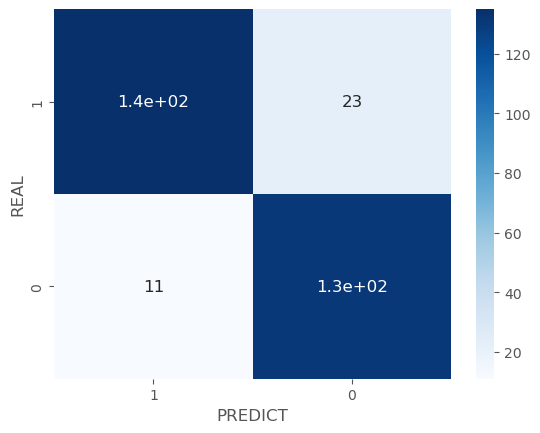

Accuracy: 0.8866666666666667
Precision: 0.851
Recall:    0.923
Fscore:    0.885




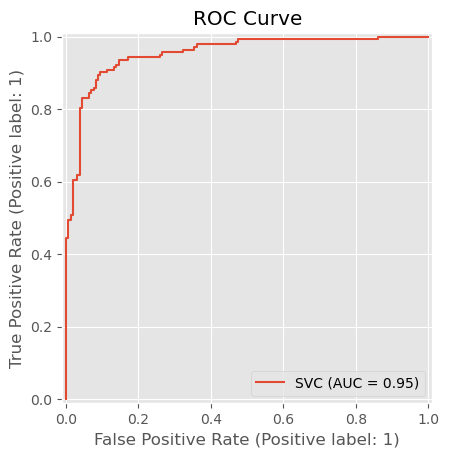

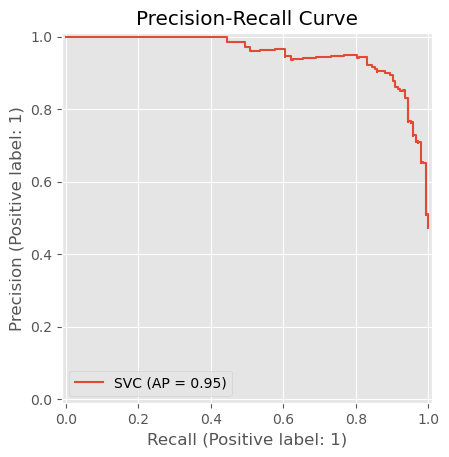

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



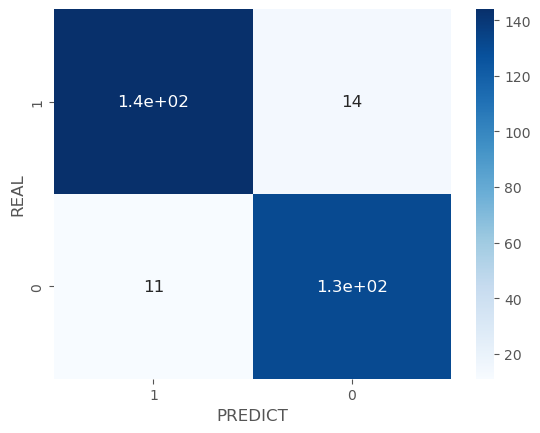

Accuracy: 0.9166666666666666
Precision: 0.903
Recall:    0.923
Fscore:    0.913




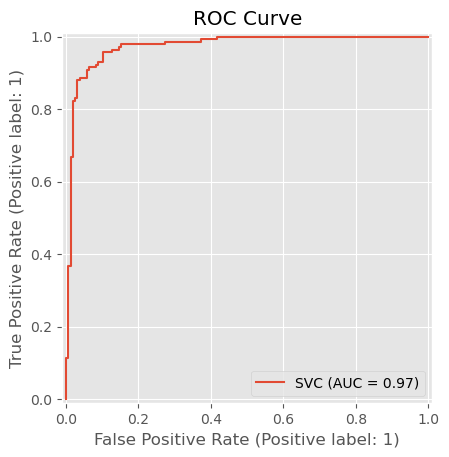

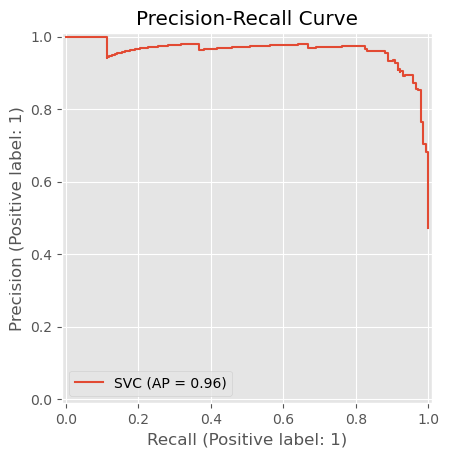

In [19]:

for svm, df_test, name in zip(svm_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_svm'] = svm.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_svm'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_svm']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_svm']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_svm']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_svm']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(svm, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(svm, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

* Mejor conjunto de datos:df3

El radial permite capturar patrones complejos y no lineales en los datos. Sin embargo, este conjunto de datos es el mejor para este modelo, como se muestra en los gráficos anteriores.

* Peor conjunto de datos: df1

Se observa que, aunque la exactitud sigue siendo alta, hay una ligera caída en precisión y recall, y la matriz de confusión muestra más errores de clasificación en comparación con el modelo lineal.


## Árbol de Decisión

### Entrenamiento y predicción

A continuación vamos a predecir nuestra clase con un Árbol de decisión. En este caso vamos a utilizar una profundidad del árbol igual a 5. Inicializa el objeto Decision Tree, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

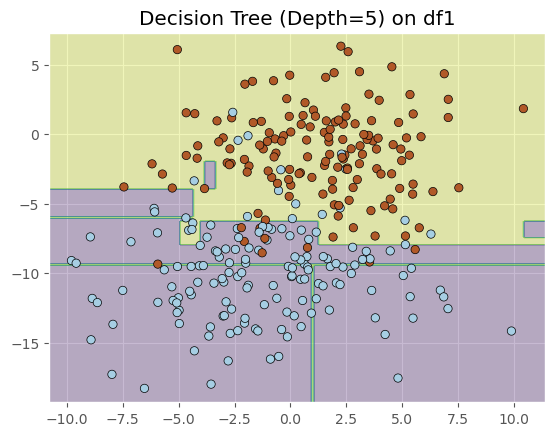

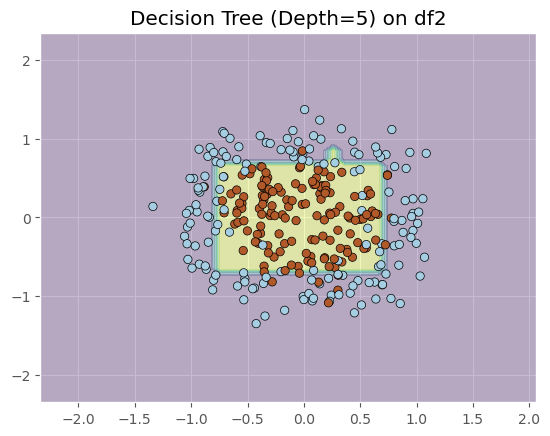

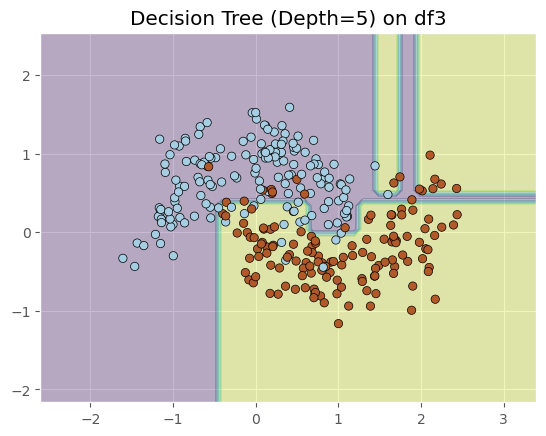

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
dt_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    dt = DecisionTreeClassifier(max_depth=5)
    dt.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=dt, legend=2)
    plt.title(f'Decision Tree (Depth=5) on {name}')
    plt.show()
    
    dt_models.append(dt)

### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



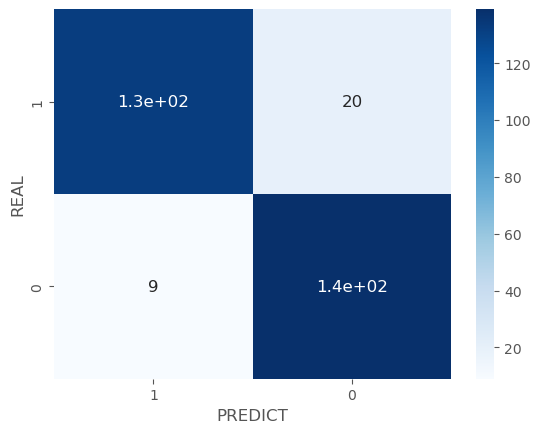

Accuracy: 0.9033333333333333
Precision: 0.874
Recall:    0.939
Fscore:    0.906




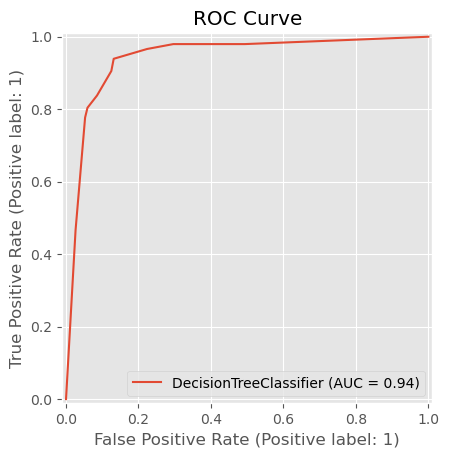

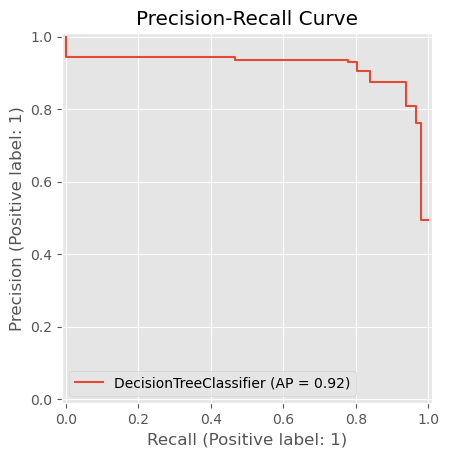

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



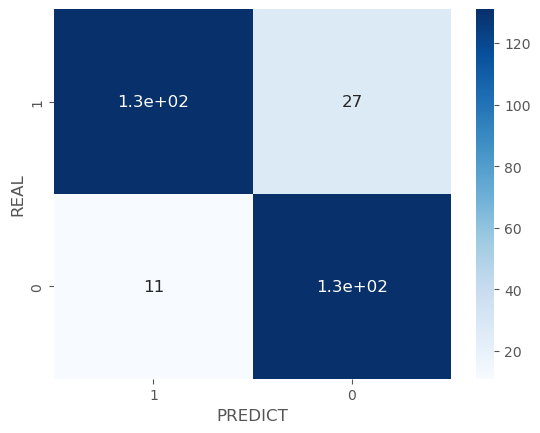

Accuracy: 0.8733333333333333
Precision: 0.829
Recall:    0.923
Fscore:    0.873




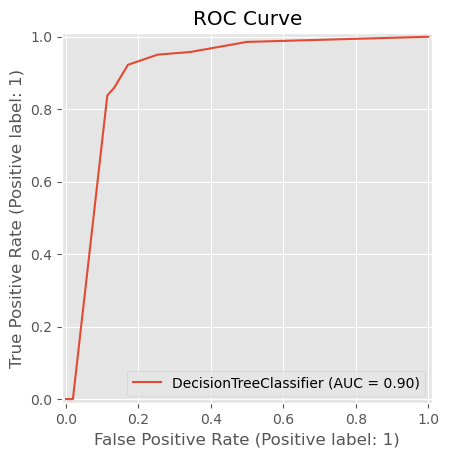

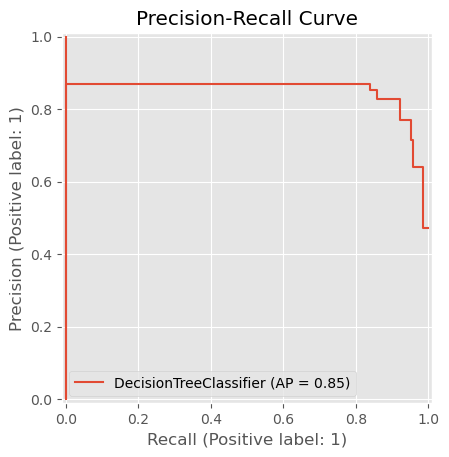

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



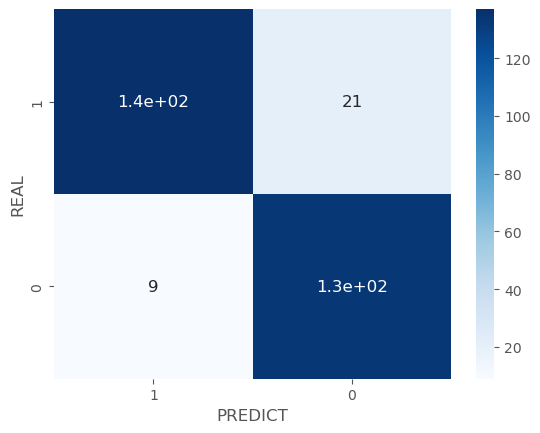

Accuracy: 0.9
Precision: 0.864
Recall:    0.937
Fscore:    0.899




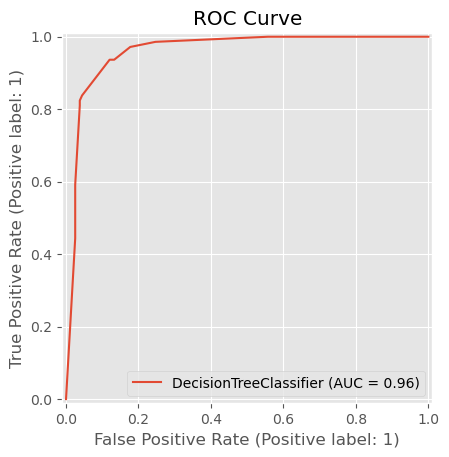

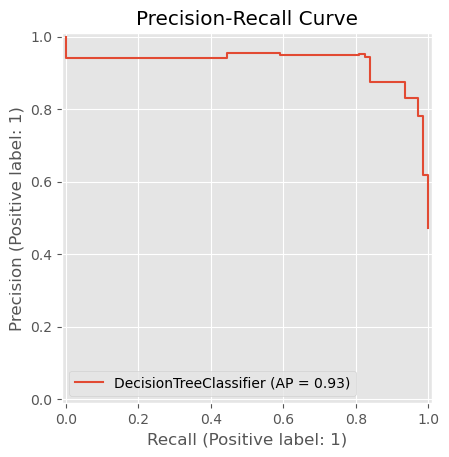

In [21]:
for dt, df_test, name in zip(dt_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_dt'] = dt.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_dt'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_dt']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_dt']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_dt']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_dt']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(dt, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(dt, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()


* Mejor conjunto de datos:df3

Tiene una alta exactitud y buena FScore. La matriz de confusión muestra que la mayoría de las classes fueron correctamente identificadas.

* Peor conjunto de datos: df2

Parece no segui reglas de segmentación claras, lo que provoca que el arbol de decisión tenga problemas para generalizar. Menor precisón y recall.



## Modelos de ensemble: Random Forest

### Entrenamiento y predicción

En este caso vamos a usar modelos de ensemble, concreatamente Random Forest, ya que es uno de los algoritmos que suele dar mejor rendimiento. Inicializa el objeto Random Forest, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

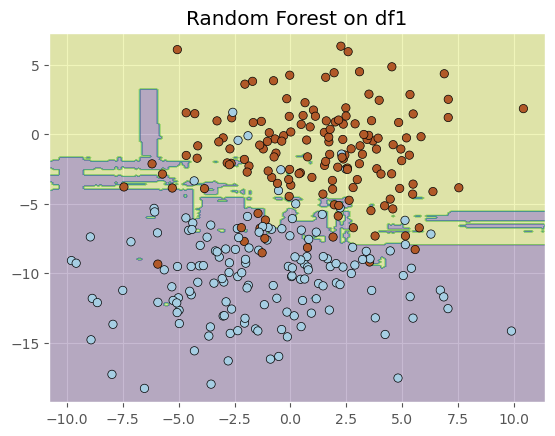

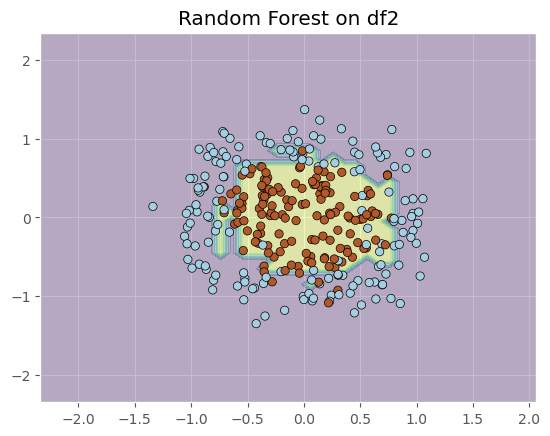

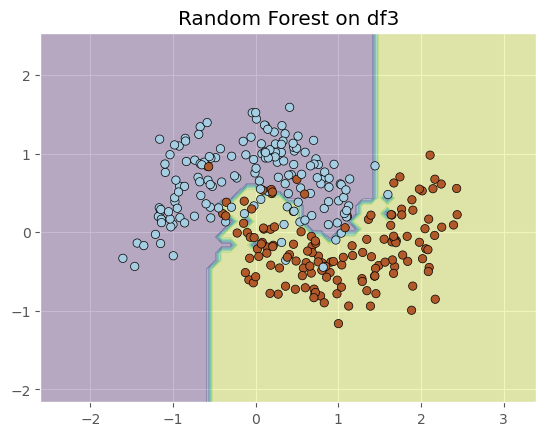

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
rf_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=rf, legend=2)
    plt.title(f'Random Forest on {name}')
    plt.show()
    
    rf_models.append(rf)



### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



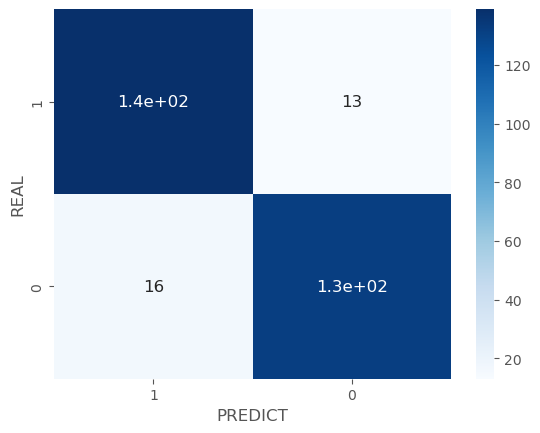

Accuracy: 0.9033333333333333
Precision: 0.91
Recall:    0.892
Fscore:    0.901




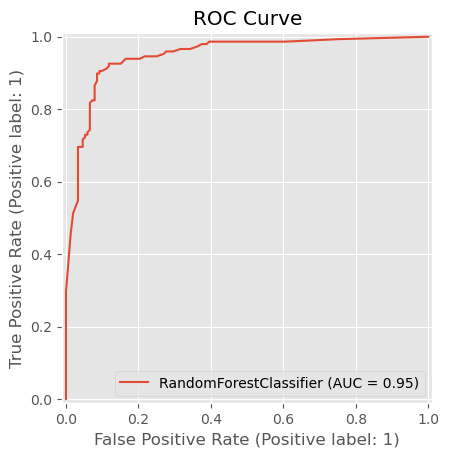

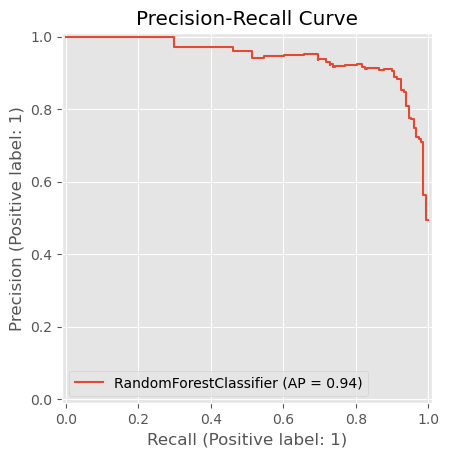

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



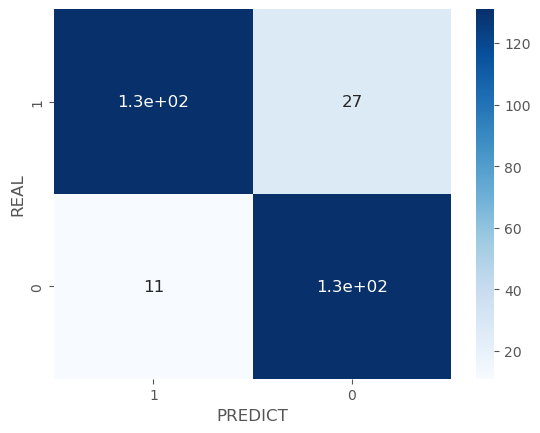

Accuracy: 0.8733333333333333
Precision: 0.829
Recall:    0.923
Fscore:    0.873




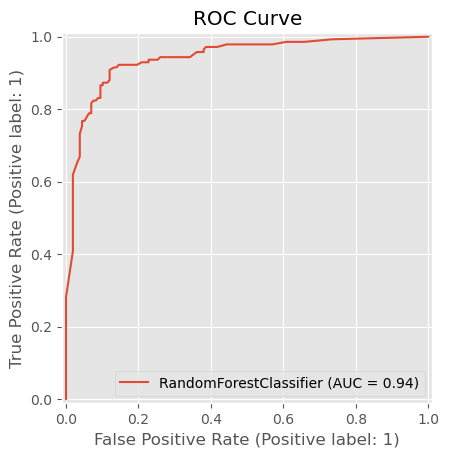

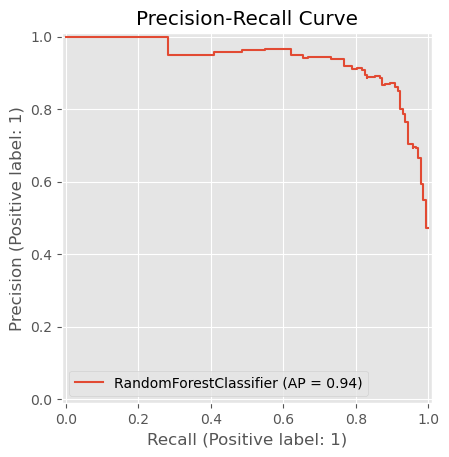

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



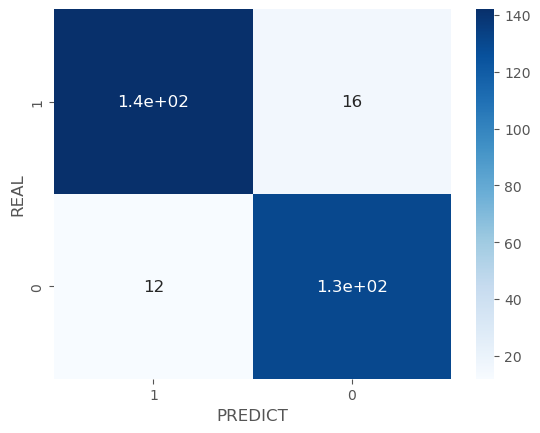

Accuracy: 0.9066666666666666
Precision: 0.89
Recall:    0.915
Fscore:    0.903




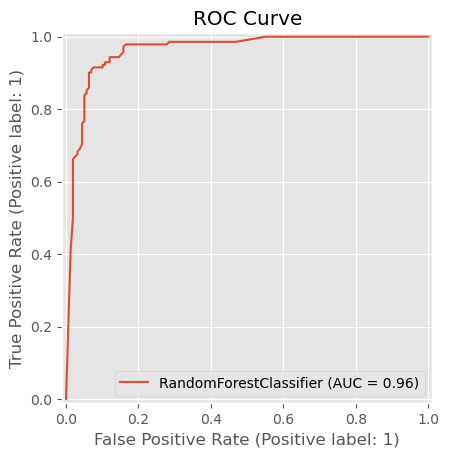

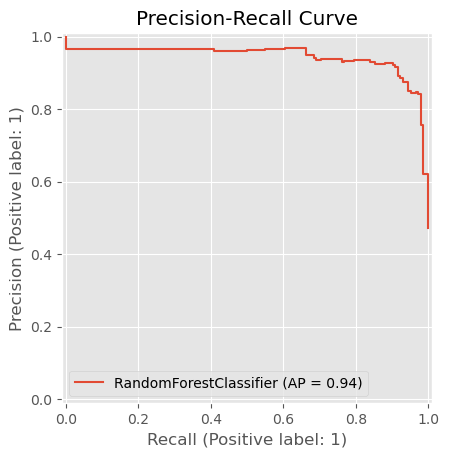

In [23]:

for rf, df_test, name in zip(rf_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_rf'] = rf.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_rf'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_rf']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_rf']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_rf']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_rf']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(rf, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(rf, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()

* Mejor conjunto de datos:df3

Random Forest combina mútliples árboles, permitiendo un aprendizaje robusto en datos con patrones complejos. El conjunto obtiene alta exactitud, una matriz de confusión con poco errores y curva ROC con excelente rendimiento.

* Peor conjunto de datos: df2

Aunque el rendimiento es mejor que en un solo árbol de decisión, df2 sigue mostrando un Fscore bajo y una alta tasa de falsos positivos y falsos negativos, indicando que los datos no tienen estructuras fácilmente identificables por el modelo.


## Modelos de boosting: Gradient Boosting

### Entrenamiento y predicción

En este caso vamos a usar modelos de boosting, concreatamente Gradint Boosting. Inicializa el objeto Gradient Boosting, entrena el modelo y dibuja los gráficos con la frontera de decisión de forma iterativa para cada conjunto de datos dentro de un bucle.

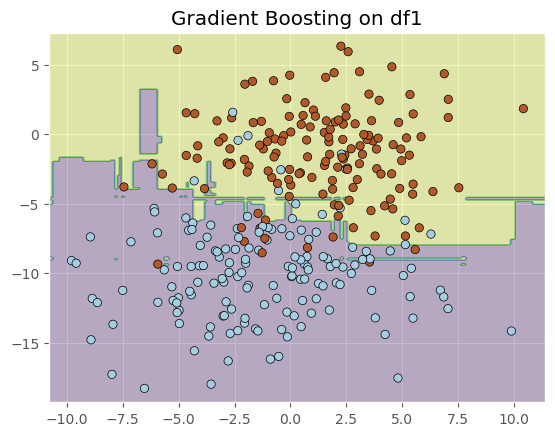

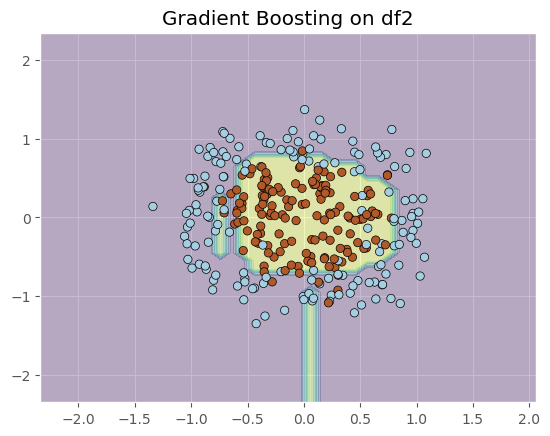

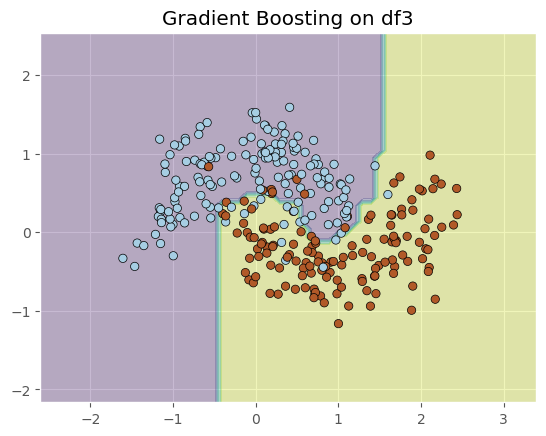

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

def plot_decision_regions(X, y, clf, legend=2):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

def load_datasets(file_paths):
    return {name: pd.read_csv(path) for name, path in file_paths.items()}

file_paths = {"df1": "df1.csv", "df2": "df2.csv", "df3": "df3.csv"}
datasets = load_datasets(file_paths)
datasets_train, datasets_test = {}, {}

for name, df in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2']], df['y'], test_size=0.3, random_state=42)
    datasets_train[name] = pd.DataFrame({'X1': X_train['X1'], 'X2': X_train['X2'], 'y': y_train})
    datasets_test[name] = pd.DataFrame({'X1': X_test['X1'], 'X2': X_test['X2'], 'y': y_test})

datasets_names = list(datasets_train.keys())
gb_models = []

for df_train, df_test, name in zip(datasets_train.values(), datasets_test.values(), datasets_names):
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    gb.fit(df_train[['X1', 'X2']], df_train['y'])
    
    plot_decision_regions(df_test[['X1', 'X2']].values, df_test['y'].values, clf=gb, legend=2)
    plt.title(f'Gradient Boosting on {name}')
    plt.show()
    
    gb_models.append(gb)


### Evaluación

Utiliza el código proporcionado anteriormente para evaluar el rendimiento del modelo.
¿Qué conjunto de datos obtiene el mejor rendimiento con este algoritmo? ¿Por qué? ¿Cuál el peor? ¿Por qué?

############################################## 
Classification Report for df1
############################################## 

Matriz de confusiòn: 



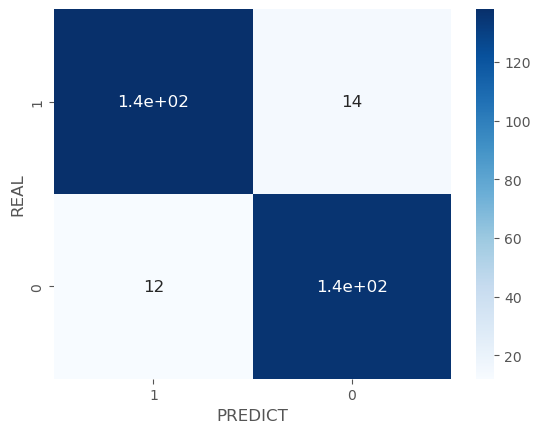

Accuracy: 0.9133333333333333
Precision: 0.907
Recall:    0.919
Fscore:    0.913




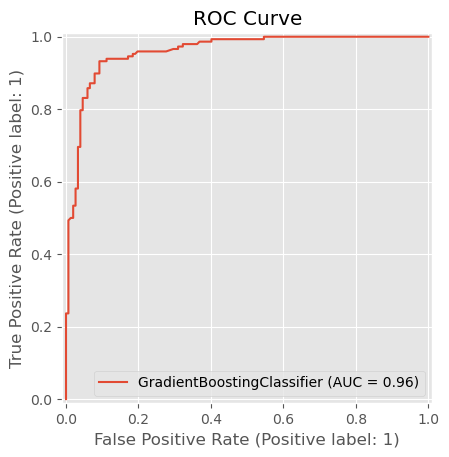

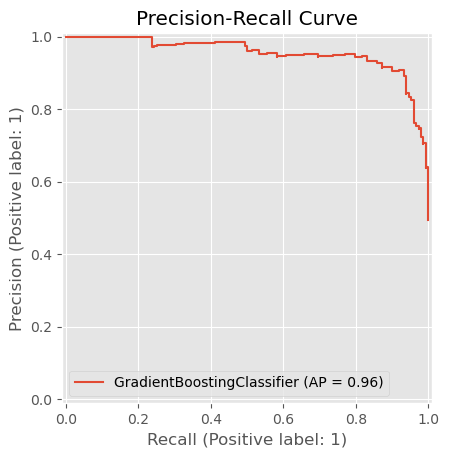

############################################## 
Classification Report for df2
############################################## 

Matriz de confusiòn: 



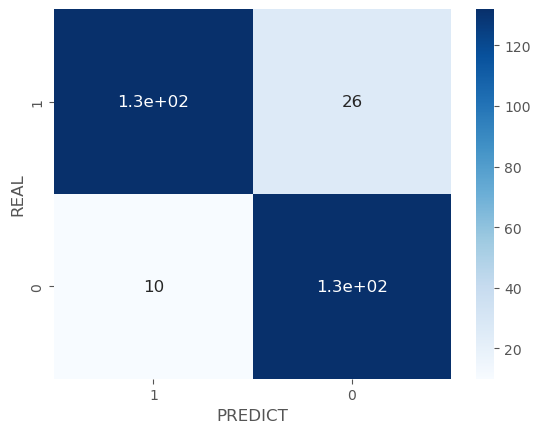

Accuracy: 0.88
Precision: 0.835
Recall:    0.93
Fscore:    0.88




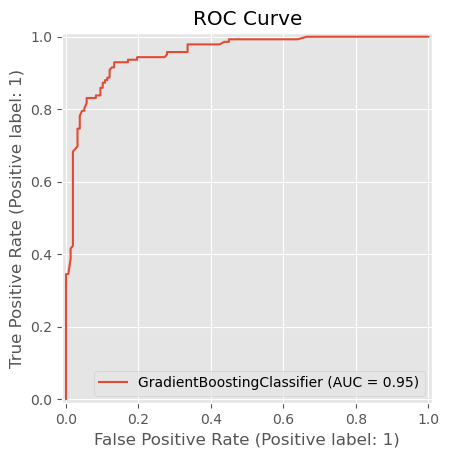

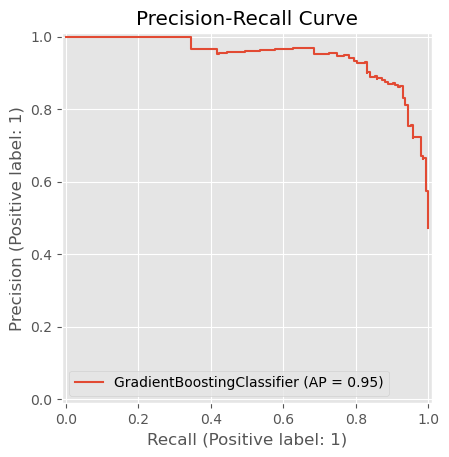

############################################## 
Classification Report for df3
############################################## 

Matriz de confusiòn: 



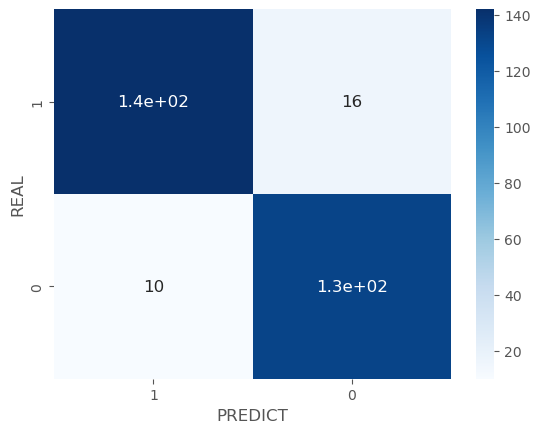

Accuracy: 0.9133333333333333
Precision: 0.892
Recall:    0.93
Fscore:    0.91




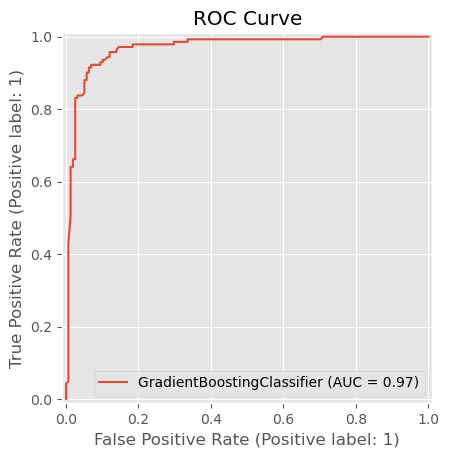

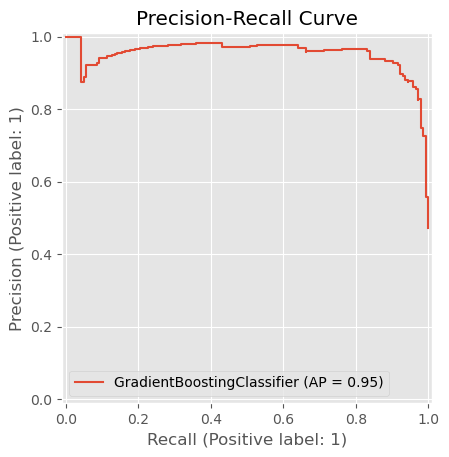

In [ ]:

for gb, df_test, name in zip(gb_models, datasets_test.values(), datasets_names):
    print('############################################## ')
    print(f'Classification Report for {name}')
    print('############################################## \n')

    df_test['y_gb'] = gb.predict(df_test[['X1', 'X2']])

    print('Matriz de confusiòn: \n')
    conf_mat = confusion_matrix(df_test['y'], df_test['y_gb'])
    sns.heatmap(conf_mat, annot=True, xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues', annot_kws={"fontsize":12})
    plt.xlabel('PREDICT')
    plt.ylabel('REAL')
    plt.show()

    print("Accuracy:", accuracy_score(df_test['y'], df_test['y_gb']))
    print('Precision:', round(precision_score(df_test['y'], df_test['y_gb']), 3))
    print('Recall:   ', round(recall_score(df_test['y'], df_test['y_gb']), 3))
    print('Fscore:   ', round(f1_score(df_test['y'], df_test['y_gb']), 3))
    print('\n')

    RocCurveDisplay.from_estimator(gb, df_test[['X1', 'X2']], df_test['y'])
    plt.title('ROC Curve')
    plt.show()

    PrecisionRecallDisplay.from_estimator(gb, df_test[['X1', 'X2']], df_test['y'])
    plt.title('Precision-Recall Curve')
    plt.show()


* Mejor conjunto de datos:df3

La exactitud es alta. La matriz de confusión refleja pocas classificaciones erróneas y la curva muestra un excelente equilibrio entre precisión y recall.

* Peor conjunto de datos: df2

No generaliza bien los datos de prueba, lo que se refleja en una caída en precisión y fscore. La curva ROC muestra que es menor en comparación con df3.
